<a href="https://colab.research.google.com/github/danielahernandz/Series-de-tiempo-avanzado/blob/main/Prophet_pasajerosAvion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pasajeros de Avion con Facebook Prophet

In [ ]:
!pip install Prophet

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('airline_passengers.csv')

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['ds', 'y'] #se deben cambiar los nombres para uso libreria
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf32k2obt/6byv5bz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf32k2obt/2vt6rsql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94698', 'data', 'file=/tmp/tmpf32k2obt/6byv5bz4.json', 'init=/tmp/tmpf32k2obt/2vt6rsql.json', 'output', 'file=/tmp/tmpf32k2obt/prophet_modelsrjrxicy/prophet_model-20230621154559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:46:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:46:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


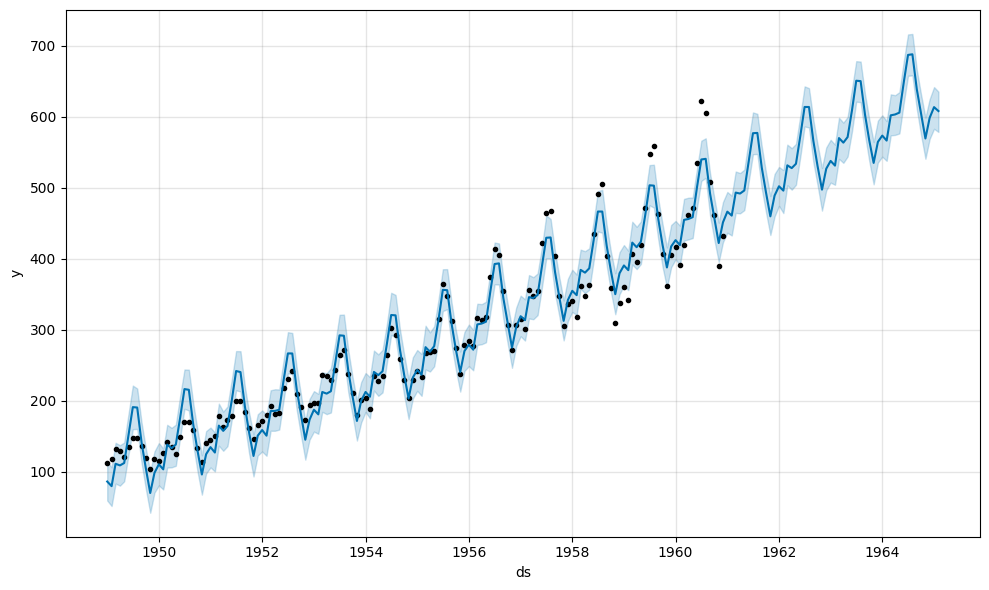

In [6]:
m = Prophet()
m.fit(df)
future= m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

Esta serie temporal tiene un ciclo anual, pero la estacionalidad en el pronostico es demasiado grande al comienzo de la serie temporal y demasiado pequeña al final. En esta serie de tiempo, la estacionalidad no es un factor aditivo constante como lo supone Prophet por defecto, sino que crece con la tendencia. Esta es la estacionalidad multiplicativa.

##Cambiamos la frecuencia a multiplicativa

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf32k2obt/4_kxejow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf32k2obt/e5soainb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46881', 'data', 'file=/tmp/tmpf32k2obt/4_kxejow.json', 'init=/tmp/tmpf32k2obt/e5soainb.json', 'output', 'file=/tmp/tmpf32k2obt/prophet_model9z8p515j/prophet_model-20230621154610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:46:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:46:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


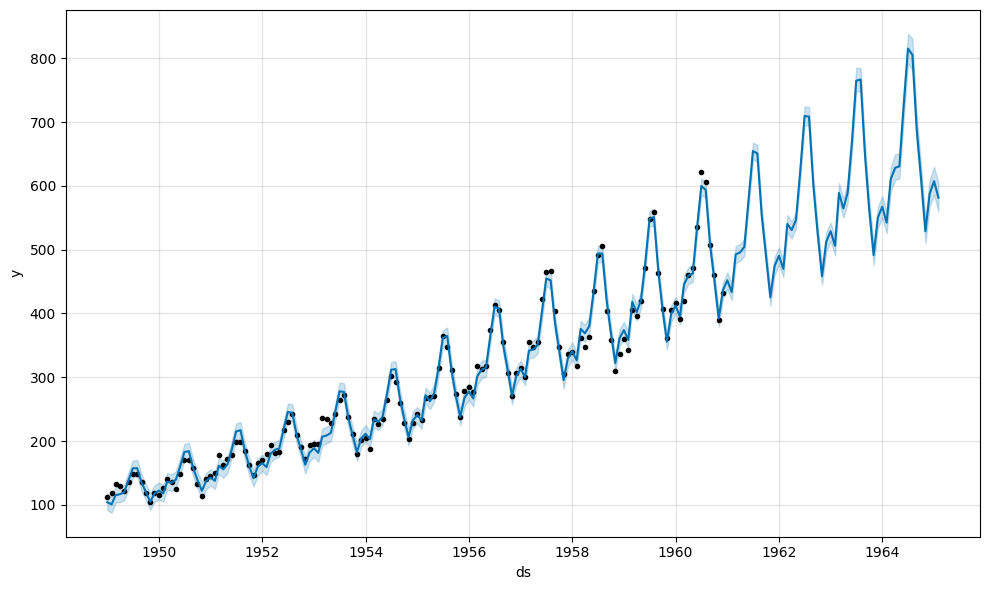

In [7]:
m = Prophet(seasonality_mode= 'multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)